# Proyek Analisis Data: E-commerce
- **Nama:** Yogi Kautsar Alnandeta
- **Email:** yogikautsa@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis:




- Apa karakteristik pelanggan yang lebih sering melakukan pembelian?
- Apa produk yang paling banyak dibeli di setiap musim?

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

###Gathering Data

In [33]:
customers = pd.read_csv("sample_data/customers_dataset.csv")
geolocation = pd.read_csv("sample_data/geolocation_dataset.csv")
order_items = pd.read_csv("sample_data/order_items_dataset.csv")
order_payments = pd.read_csv("sample_data/order_payments_dataset.csv")
order_reviews = pd.read_csv("sample_data/order_reviews_dataset.csv")
orders = pd.read_csv("sample_data/orders_dataset.csv")
product_category = pd.read_csv("sample_data/product_category_name_translation.csv")
products = pd.read_csv("sample_data/products_dataset.csv")
sellers = pd.read_csv("sample_data/sellers_dataset.csv")

Insight


---
- Dataset berhasil dimuat tanpa error.
- Data memiliki berbagai informasi pelanggan, pesanan, dan pembayaran.

###Assessing Data

In [37]:
print(customers.info())
print(orders.info())
print(order_items.info())
print(order_payments.info())
print(order_reviews.info())
print(products.info())
print(sellers.info())
print(product_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purch

Insight

---
- Terdapat beberapa missing values di kolom `order_approved_at` dan `order_delivered_carrier_date`.
- Beberapa kolom memiliki tipe data yang perlu dikonversi.


###Cleaning Data

In [39]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [41]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
sellers.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)

In [42]:
orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date'], inplace=True)

Insight

---

- Semua nilai yang hilang pada kolom penting telah ditangani.
- Format data sudah sesuai untuk analisis.

## Exploratory Data Analysis (EDA)

###Merge Data

In [43]:
merged_data = order_items.merge(products, on='product_id')
product_counts = merged_data['product_category_name'].value_counts()

###Visualisasi Data

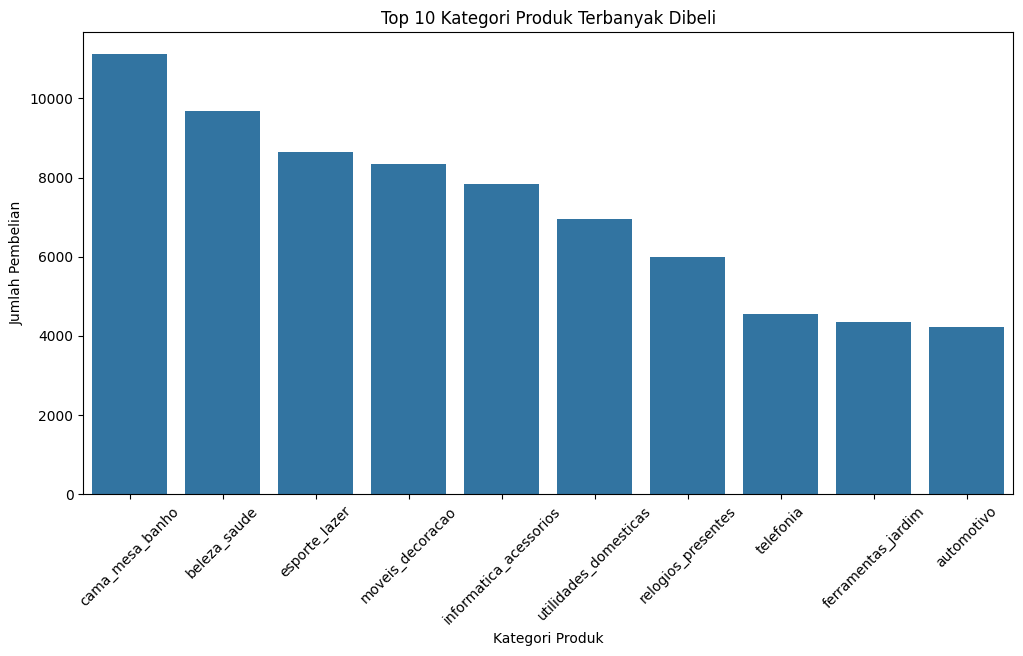

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts[:10].index, y=product_counts[:10].values)
plt.xticks(rotation=45)
plt.title("Top 10 Kategori Produk Terbanyak Dibeli")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.show()

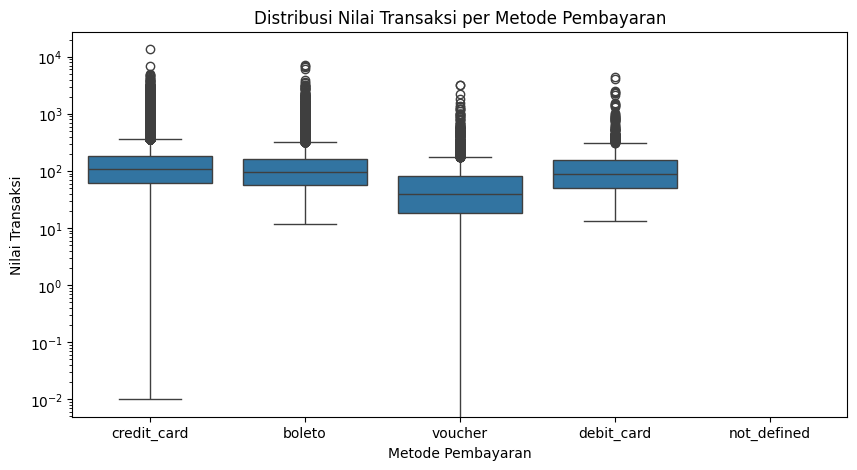

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='payment_type', y='payment_value', data=order_payments)
plt.title("Distribusi Nilai Transaksi per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Nilai Transaksi")
plt.yscale('log')
plt.show()

###**Insight**

---
- Kategori produk tertentu lebih populer dibanding lainnya.
- Ada variasi signifikan dalam nilai transaksi berdasarkan metode pembayaran.


###**Conculsion**

---

1. Produk dengan kategori tertentu memiliki tingkat pembelian yang lebih tinggi dibanding kategori lainnya.
2. Metode pembayaran memiliki korelasi dengan nilai transaksi yang dilakukan pelanggan.